This tutorial is based on Jiuxun Yin's notebook at https://github.com/yinjiuxun/DAS_aws_Ridgecrest/blob/master/access_aws_data.ipynb.

In [1]:
import os, sys, logging
import boto3
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Exploring the dataset

In [11]:
# Use the AWS CLI to see the contents of s3://scedc-pds
# under the Ridgecrest_DAS prefix.
!aws s3 ls s3://scedc-pds/Ridgecrest_DAS/

                           PRE SEG-Y/
2022-05-19 13:40:00      35471 das_info.csv


In [12]:
!aws s3 ls s3://scedc-pds/Ridgecrest_DAS/SEG-Y/hourly/

2022-04-27 13:42:08 4500303600 2020062000.segy
2022-04-27 13:42:08 4500303600 2020062001.segy
2022-04-27 13:42:08 4500303600 2020062002.segy
2022-04-27 13:42:08 4500303600 2020062003.segy
2022-04-27 13:42:08 4500303600 2020062004.segy
2022-04-27 13:43:28 4500303600 2020062005.segy
2022-04-27 13:43:28 4500303600 2020062006.segy
2022-04-27 13:43:28 4500303600 2020062007.segy
2022-04-27 13:43:29 4500303600 2020062008.segy
2022-04-27 13:43:30 4500303600 2020062009.segy
2022-04-27 13:44:54 4500303600 2020062010.segy
2022-04-27 13:44:55 4500303600 2020062011.segy
2022-04-27 13:44:55 4500303600 2020062012.segy
2022-04-27 13:44:58 4500303600 2020062013.segy
2022-04-27 13:44:58 4500303600 2020062014.segy
2022-04-27 13:46:18 4500303600 2020062015.segy
2022-04-27 13:46:18 4500303600 2020062016.segy
2022-04-27 13:46:21 4500303600 2020062017.segy
2022-04-27 13:46:24 4500303600 2020062018.segy
2022-04-27 13:46:24 4500303600 2020062019.segy
2022-04-27 13:47:55 4500303600 2020062020.segy
2022-04-27 13

2022-04-27 22:53:59 4500303600 2020070304.segy
2022-04-27 22:54:02 4500303600 2020070305.segy
2022-04-27 22:54:06 4500303600 2020070306.segy
2022-04-27 22:54:08 4500303600 2020070307.segy
2022-04-27 22:54:08 4500303600 2020070308.segy
2022-04-27 22:55:21 4500303600 2020070309.segy
2022-04-27 22:55:23 4500303600 2020070311.segy
2022-04-27 22:55:28 4500303600 2020070312.segy
2022-04-27 22:55:29 4500303600 2020070313.segy
2022-04-27 22:55:29 4500303600 2020070314.segy
2022-04-27 22:56:42 4500303600 2020070315.segy
2022-04-27 22:56:44 4500303600 2020070316.segy
2022-04-27 22:56:49 4500303600 2020070317.segy
2022-04-27 22:56:49 4500303600 2020070318.segy
2022-04-27 22:56:50 4500303600 2020070319.segy
2022-04-27 22:58:03 4500303600 2020070320.segy
2022-04-27 22:58:04 4500303600 2020070321.segy
2022-04-27 22:58:09 4500303600 2020070322.segy
2022-04-27 22:58:10 4500303600 2020070323.segy
2022-04-27 22:58:11 4500303600 2020070400.segy
2022-04-27 22:59:22 4500303600 2020070401.segy
2022-04-27 22

2022-04-28 00:02:32 4500303600 2020071311.segy
2022-04-28 00:02:34 4500303600 2020071312.segy
2022-04-28 00:02:34 4500303600 2020071313.segy
2022-04-28 00:02:39 4500303600 2020071314.segy
2022-04-28 00:02:41 4500303600 2020071315.segy
2022-04-28 00:04:00 4500303600 2020071316.segy
2022-04-28 00:04:02 4500303600 2020071317.segy
2022-04-28 00:04:03 4500303600 2020071318.segy
2022-04-28 00:04:08 4500303600 2020071319.segy
2022-04-28 00:04:11 4500303600 2020071320.segy
2022-04-28 00:05:24 4500303600 2020071321.segy
2022-04-28 00:05:26 4500303600 2020071322.segy
2022-04-28 00:05:26 4500303600 2020071323.segy
2022-04-28 00:05:31 4500303600 2020071400.segy
2022-04-28 00:05:33 4500303600 2020071401.segy
2022-04-28 00:06:47 4500303600 2020071402.segy
2022-04-28 00:06:47 4500303600 2020071403.segy
2022-04-28 00:06:48 4500303600 2020071404.segy
2022-04-28 00:06:52 4500303600 2020071405.segy
2022-04-28 00:06:54 4500303600 2020071406.segy
2022-04-28 00:08:09 4500303600 2020071407.segy
2022-04-28 00

2022-04-28 01:19:33 4500303600 2020072503.segy
2022-04-28 01:19:40 4500303600 2020072504.segy
2022-04-28 01:19:41 4500303600 2020072505.segy
2022-04-28 01:20:53 4500303600 2020072506.segy
2022-04-28 01:20:55 4500303600 2020072507.segy
2022-04-28 01:20:56 4500303600 2020072508.segy
2022-04-28 01:21:05 4500303600 2020072509.segy
2022-04-28 01:21:08 4500303600 2020072510.segy
2022-04-28 01:22:19 4500303600 2020072511.segy
2022-04-28 01:22:20 4500303600 2020072512.segy
2022-04-28 01:22:20 4500303600 2020072513.segy
2022-04-28 01:22:30 4500303600 2020072514.segy
2022-04-28 01:22:32 4500303600 2020072515.segy
2022-04-28 01:23:48 4500303600 2020072516.segy
2022-04-28 01:23:50 4500303600 2020072517.segy
2022-04-28 01:23:51 4500303600 2020072518.segy
2022-04-28 01:24:00 4500303600 2020072519.segy
2022-04-28 01:24:01 4500303600 2020072520.segy
2022-04-28 01:25:12 4500303600 2020072521.segy
2022-04-28 01:25:14 4500303600 2020072522.segy
2022-04-28 01:25:16 4500303600 2020072523.segy
2022-04-28 01

# Downloading data

In [2]:
# AWS keys can be set in ${HOME}/.aws/credentials, 
# $HOME/.aws/config, or environment variables.

s3 = boto3.resource('s3')
bucket = s3.Bucket('scedc-pds')
s3.meta.client.head_bucket(Bucket='scedc-pds')

{'ResponseMetadata': {'RequestId': 'E8PPWGG03NXWKY9R',
  'HostId': '9dVAXHHz8PtDjujIDuiyba72Fr4GX4mk6LQQvw1zDfurPWB2Up9Bk03nEwoADyQmwVCIPqHAZF0XhvcCdi+MEw==',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '9dVAXHHz8PtDjujIDuiyba72Fr4GX4mk6LQQvw1zDfurPWB2Up9Bk03nEwoADyQmwVCIPqHAZF0XhvcCdi+MEw==',
   'x-amz-request-id': 'E8PPWGG03NXWKY9R',
   'date': 'Sat, 10 Sep 2022 08:13:07 GMT',
   'x-amz-bucket-region': 'us-west-2',
   'x-amz-access-point-alias': 'false',
   'content-type': 'application/xml',
   'server': 'AmazonS3'},
  'RetryAttempts': 1}}

In [3]:
download_dir = 'download_test/'
data_dir = download_dir + '/Ridgecrest_DAS/SEG-Y/hourly'
key = 'Ridgecrest_DAS/SEG-Y/hourly/2020062417.segy'
data_file = download_dir + key
das_channel_key = 'Ridgecrest_DAS/das_info.csv'

In [ ]:
import os

def make_dirs(path):
    """ Create all the directories in a relative path.
    """
    
    dir_to_make = ''
    for d in path.split('/'):
        if d != '':
            if dir_to_make != '':
                dir_to_make += '/'
            dir_to_make += d
            try:
                print(dir_to_make)
                os.mkdir(dir_to_make)
            except FileExistsError:
                pass
            except:
                print('Failed to make', dir_to_make)
                
make_dirs(data_dir)                

In [4]:
# Download the channel information.
bucket.download_file(das_channel_key, download_dir + '/Ridgecrest_DAS/das_info.csv')

In [ ]:
# Download the data file.
bucket.download_file(key, download_dir + '/' + key)

# Processing Data

#### These functions will read SEG-Y to NumPy and downsample and plot the data.

In [5]:
# Function to load the DAS data
def read_PASSCAL_segy(infile, nTraces=1250, nSample=900000, TraceOff=0):
    """Function to read PASSCAL segy raw data
    For Ridgecrest data, there are 1250 channels in total,
    Sampling rate is 250 Hz so for one hour data: 250 * 3600 samples
    """
    fs = nSample/ 3600 # sampling rate
    data = np.zeros((nTraces, nSample), dtype=np.float32)
    gzFile = False
    if infile.split(".")[-1] == "segy":
        fid = open(infile, 'rb')
    elif infile.split(".")[-1] == "gz":
        gzFile = True
        fid = gzip.open(infile, 'rb')
    fid.seek(3600)
    # Skipping traces if necessary
    fid.seek(TraceOff*(240+nSample*4),1)
    # Looping over traces
    for ii in range(nTraces):
        fid.seek(240, 1)
        if gzFile:
            # np.fromfile does not work on gzip file
            BinDataBuffer = fid.read(nSample*4) # read binary bytes from file
            data[ii, :] = struct.unpack_from(">"+('f')*nSample, BinDataBuffer)
        else:
            data[ii, :] = np.fromfile(fid, dtype=np.float32, count=nSample)
    fid.close()

    # Convert the phase-shift to strain (in nanostrain)
    Ridgecrest_conversion_factor = 1550.12 / (0.78 * 4 * np.pi * 1.46 * 8)
    data = data * Ridgecrest_conversion_factor

    das_time = np.arange(0, data.shape[1]) * 1 / fs

    return data, das_time

# downsample functions: downsample the DAS data to a given frequency fd
def downsample_das(data, das_time, fd=100):
    """
    Down sample das data to fd Hz
    data, das_time_downsampled = donwsample_das(data, das_time, fd=100)
    """
    das_dt_ds = 1/fd
    das_time_downsampled = np.arange(0, das_time[-1], das_dt_ds)

    downsample_f = interp1d(das_time, data, axis=1, bounds_error=False, fill_value=0)
    data = downsample_f(das_time_downsampled)
    return data, das_time_downsampled

# plot the DAS data
def show_data(data, das_time, pclip=99.5):
    fig, ax1 = plt.subplots(figsize=(8,4))
    clipVal = np.percentile(np.absolute(data), pclip)
    ax1.imshow(data.T, 
                extent=[0, data.shape[0], das_time[-1], das_time[0]],
                aspect='auto', vmin=-clipVal, vmax=clipVal, cmap=plt.get_cmap('seismic'))

    ax1.set_xlabel("Channel number")
    ax1.set_ylabel("Time [s]")
    ax1.grid()
    return fig, ax1

#### Load information about the DAS array from the channel file. This information can be used to filter the data to include only channels that are in the channel file.

In [6]:
temp = np.genfromtxt(download_dir + '/Ridgecrest_DAS/das_info.csv', delimiter=',', skip_header=1)
channel_index = temp[:, 0].astype('int') # Index of good channels
channel_lat = temp[:, 1] # channel latitude
channel_lon = temp[:, 2] # channel longitude

#### Load the data from the SEG-Y file with units of nano strain and filter by channel.

In [7]:
data, das_time = read_PASSCAL_segy(data_file) # Data shape: n_channel x n_samples, data unit is nano strain
dt = das_time[1] - das_time[0]
strain = data[channel_index, :]
strain.shape

(1150, 900000)

#### Downsample the data.

In [8]:
# Downsample the data.
strain, das_time = downsample_das(strain, das_time, fd=100)
strain.shape

(1150, 360000)

Text(0.5, 1.0, 'Raw Strain')

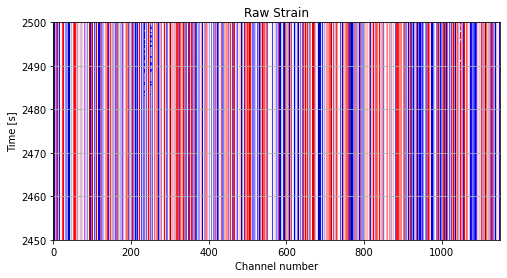

In [13]:
# Show how the raw data looks 
fig, ax1 = show_data(strain[:, ::20], das_time, pclip=98)
ax1.set_ylim(2450, 2500)
ax1.set_title('Raw Strain')

#### Apply a high-pass filter to remove low-frequency signals and show earthquake signals.

In [9]:
from scipy.signal import butter, sosfiltfilt

sos = butter(4, 0.5*2*dt, output='sos', btype='high')
strain_filt = sosfiltfilt(sos, strain, axis=1)

Text(0.5, 1.0, 'High-passed Strain')

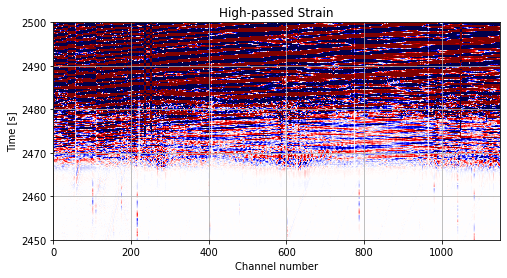

In [14]:
fig, ax2 = show_data(strain_filt[:, ::20], das_time, pclip=98)
ax2.set_ylim(2450, 2500)
ax2.set_title('High-passed Strain')

#### Directly convert the raw strain to strain rate.

In [15]:
strain_rate = np.diff(strain, axis=1)
strain_rate_time = das_time[:-1] + dt/2

Text(0.5, 1.0, 'Strain rate')

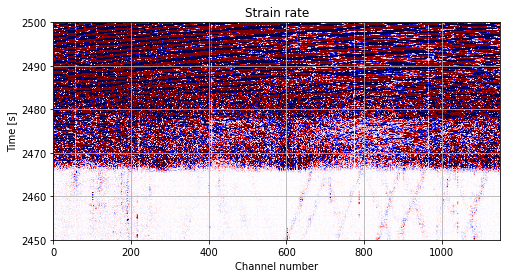

In [16]:
fig, ax3 = show_data(strain_rate[:, ::20], strain_rate_time, pclip=98)
ax3.set_ylim(2450, 2500)
ax3.set_title('Strain rate')

#### Show the time series.

Text(0.5, 1.0, 'Strain rate')

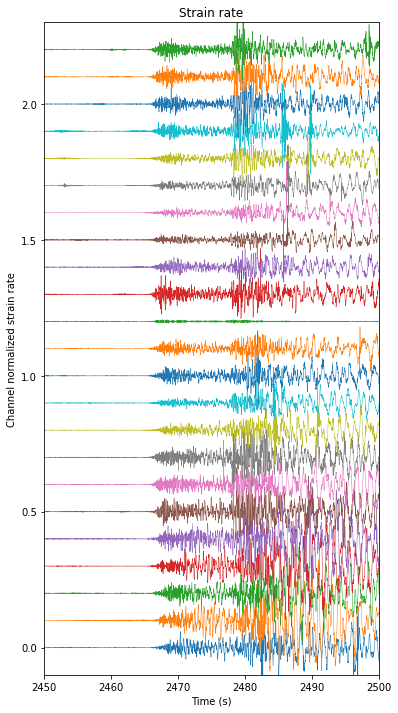

In [17]:
# Show data in time series
clipVal = np.percentile(np.absolute(strain_rate_time), 98)
strain_rate1 = strain_rate/clipVal
fig, ax = plt.subplots(figsize=(6, 12))
for i in range(0, 1150, 50):
    ax.plot(strain_rate_time, strain_rate1[i, :] + i/500, linewidth=0.5)

ax.set_ylim(-0.1, 2.3)
ax.set_xlim(2450, 2500)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Channel normalized strain rate')
ax.set_title('Strain rate')

### This notebook will be available at https://github.com/SCEDC/cloud.